# EPAM DS course. Regression 1.1

# Loading the needed libraries.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from tqdm import tqdm_notebook

import os

import warnings
warnings.filterwarnings('ignore')

from pandas_profiling import ProfileReport

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

random_state=17

from scipy.stats import skew

# Loading the data.

In [3]:
DATA_PATH = "data/Reg_1_1"

In [4]:
# train_df = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
train_df = pd.read_csv("train.csv")
train_df.shape

(1460, 81)

In [5]:
# test_df = pd.read_csv(os.path.join(DATA_PATH, "test.csv"))
test_df = pd.read_csv("test.csv")
test_df.shape

(1459, 80)

# First look at the data.

In [6]:
train_df.head(4).T

,0,1,2,3
Id,1,2,3,4
MSSubClass,60,20,60,70
MSZoning,RL,RL,RL,RL
LotFrontage,65,80,68,60
LotArea,8450,9600,11250,9550
Street,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
ProfileReport(train_df)

Number of variables,81
Number of observations,1460
Total Missing (%),5.9%
Total size in memory,924.0 KiB
Average record size in memory,648.1 B
Numeric,38
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Text(0.5,1,'Correlation matrix')

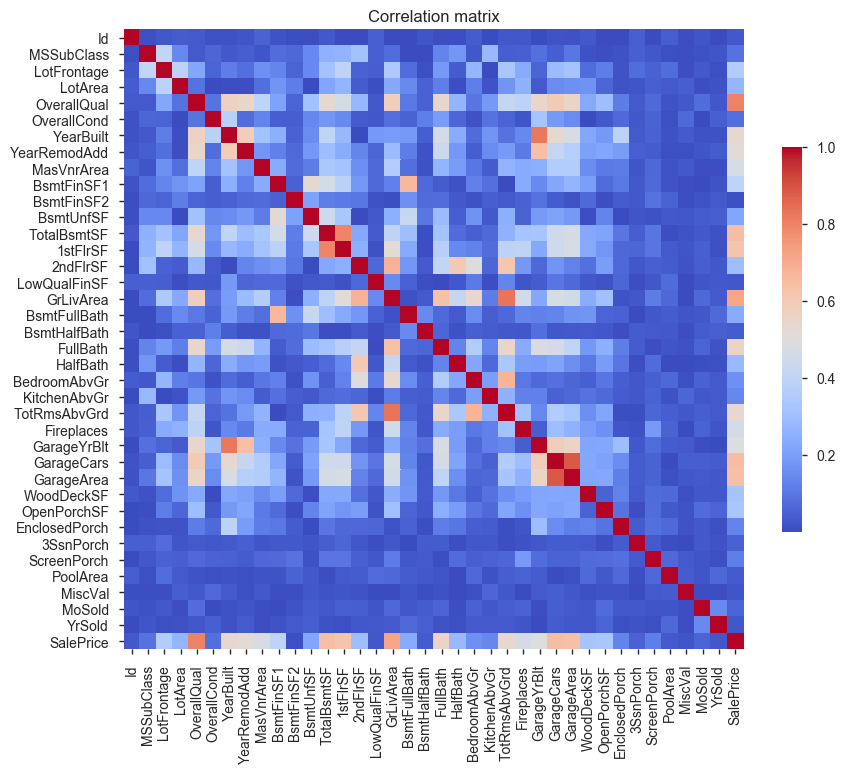

In [91]:
plt.figure(figsize=(10, 10))
corr = np.abs(train_df.corr())
ax = sns.heatmap(corr,  square=True, cbar_kws={"shrink": .5}, cmap="coolwarm")  #center=0,
plt.title("Correlation matrix")

Look at the features that correlate most with SalePrice.

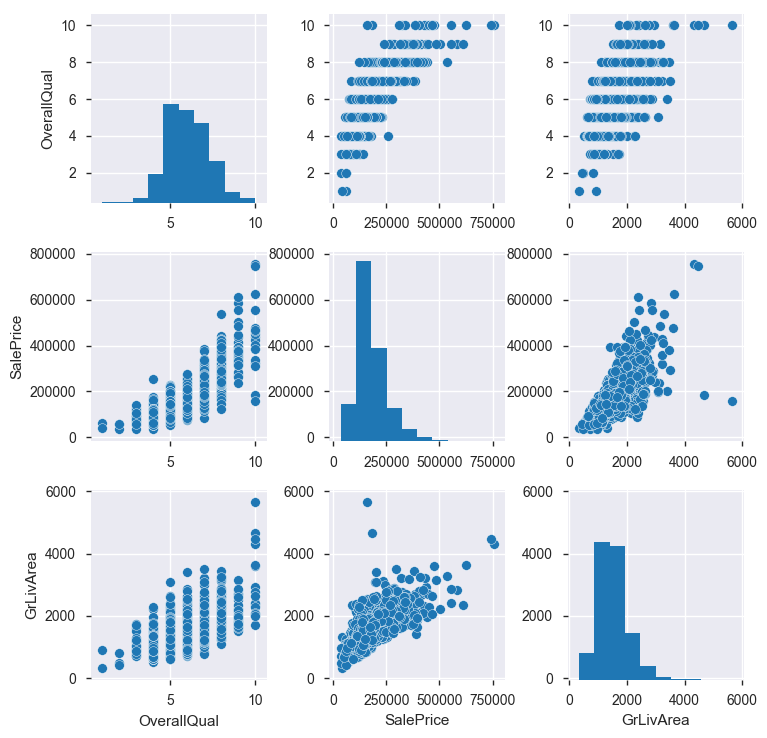

In [11]:
sns_plot = sns.pairplot(train_df[["OverallQual", "SalePrice", "GrLivArea"]])

Closer look at GrLivArea.

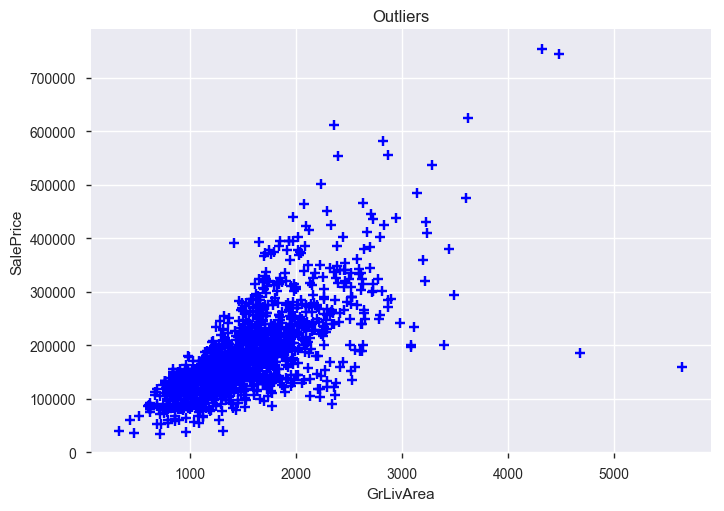

In [12]:
plt.scatter(train_df.GrLivArea, train_df.SalePrice, c = "blue", marker = "+")
plt.title("Outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

Let's trow away outliers and separate target. The author of the dataset recommends removing 'any houses with more than 4000 square feet' from the dataset.

In [13]:
train_df = train_df[train_df.GrLivArea < 4000]

target = train_df.SalePrice
#train_df.pop("SalePrice");
train_index = train_df.shape[0]
train_df.shape

(1456, 81)

A look at the distribution of target variable.

Text(0.5,1,'Price')

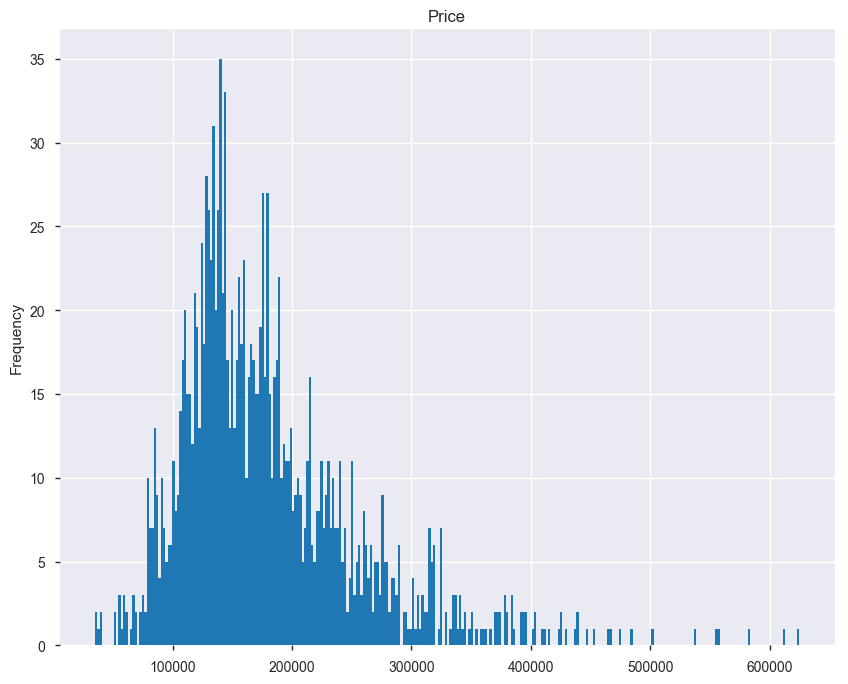

In [14]:
target.plot.hist(bins = 300, figsize=(10, 8))
plt.title("Price")

In [15]:
log_target = np.log(target)

Text(0.5,1,'Log price')

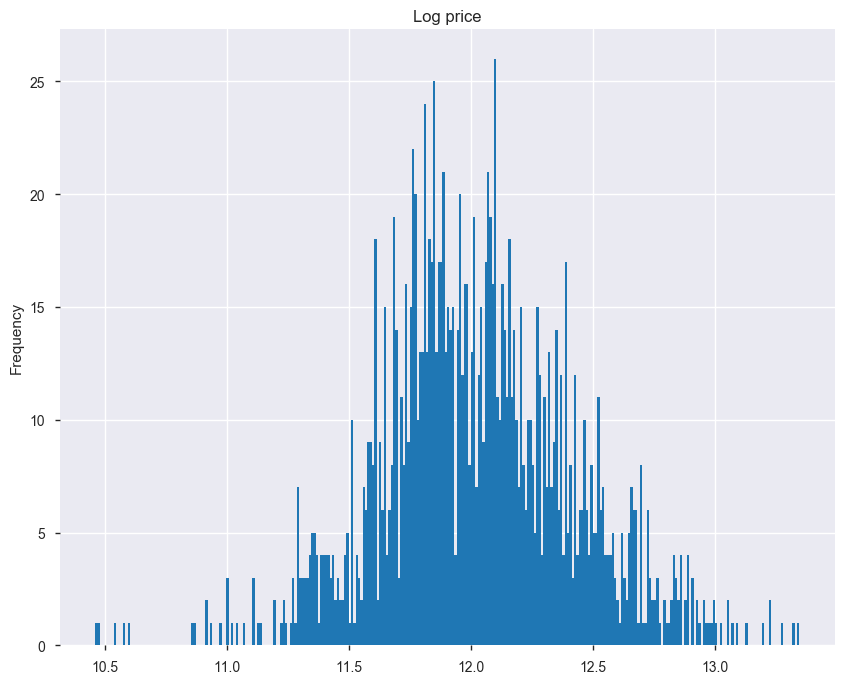

In [16]:
log_target.plot.hist(bins = 300, figsize=(10, 8))
plt.title("Log price")

Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.

Let's make a common df with out Id and SalePrice.

In [17]:
all_data = pd.concat((train_df.loc[:,'MSSubClass':'SaleCondition'],
                      test_df.loc[:,'MSSubClass':'SaleCondition']))
all_data.shape

(2915, 79)

# Preprocessing.

## Categorical features.

In [18]:
cat_df = all_data.select_dtypes(['object'])

In [19]:
cat_df.shape

(2915, 43)

In [20]:
cat_columns = cat_df.columns

In [21]:
cat_df.head().T

,0,1,2,3,4
MSZoning,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge
Condition1,Norm,Feedr,Norm,Norm,Norm


### Working with NaN's.

In [22]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 0 to 1458
Data columns (total 43 columns):
MSZoning         2911 non-null object
Street           2915 non-null object
Alley            198 non-null object
LotShape         2915 non-null object
LandContour      2915 non-null object
Utilities        2913 non-null object
LotConfig        2915 non-null object
LandSlope        2915 non-null object
Neighborhood     2915 non-null object
Condition1       2915 non-null object
Condition2       2915 non-null object
BldgType         2915 non-null object
HouseStyle       2915 non-null object
RoofStyle        2915 non-null object
RoofMatl         2915 non-null object
Exterior1st      2914 non-null object
Exterior2nd      2914 non-null object
MasVnrType       2891 non-null object
ExterQual        2915 non-null object
ExterCond        2915 non-null object
Foundation       2915 non-null object
BsmtQual         2834 non-null object
BsmtCond         2833 non-null object
BsmtExposure     283

Looking at NaNs.

In [23]:
cat_df.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          2907
MiscFeature     2810
Alley           2717
Fence           2345
FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Utilities          2
Electrical         1
KitchenQual        1
SaleType           1
Exterior2nd        1
Exterior1st        1
Heating            0
Condition1         0
dtype: int64

Let's delete features with more than 1000 NaNs, top 5 in the list above.

In [24]:
Index_cat_bigger_1000 = cat_df.isnull().sum().sort_values(ascending=False) > 1000
List_cat_w_NaN_b1000 = list(cat_df.isnull().sum().sort_values(ascending=False).loc[Index_cat_bigger_1000].keys())
List_cat_w_NaN_b1000

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [25]:
# Alley : data description says NA means "no alley access"
cat_df.loc[:, "Alley"] = cat_df.loc[:, "Alley"].fillna("None")

# MiscFeature : data description says NA means "no misc feature"
cat_df.loc[:, "MiscFeature"] = cat_df.loc[:, "MiscFeature"].fillna("No")

# PoolQC : data description says NA means "no pool"
cat_df.loc[:, "PoolQC"] = cat_df.loc[:, "PoolQC"].fillna("No")

# Fence : data description says NA means "no fence"
cat_df.loc[:, "Fence"] = cat_df.loc[:, "Fence"].fillna("No")

# FireplaceQu : data description says NA means "no fireplace"
cat_df.loc[:, "FireplaceQu"] = cat_df.loc[:, "FireplaceQu"].fillna("No")

Let's fill the rest.

In [26]:
Index_cat_bigger_0 = cat_df.isnull().sum().sort_values(ascending=False) > 0
List_cat_w_NaN_to_analyse = list(cat_df.isnull().sum().sort_values(ascending=False).loc[Index_cat_bigger_0].keys())
List_cat_w_NaN_to_analyse

['GarageCond',
 'GarageQual',
 'GarageFinish',
 'GarageType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType2',
 'BsmtFinType1',
 'MasVnrType',
 'MSZoning',
 'Functional',
 'Utilities',
 'SaleType',
 'KitchenQual',
 'Exterior2nd',
 'Exterior1st',
 'Electrical']

In [27]:
len(List_cat_w_NaN_to_analyse)

18

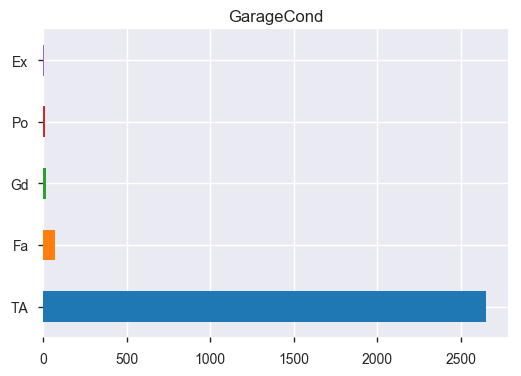

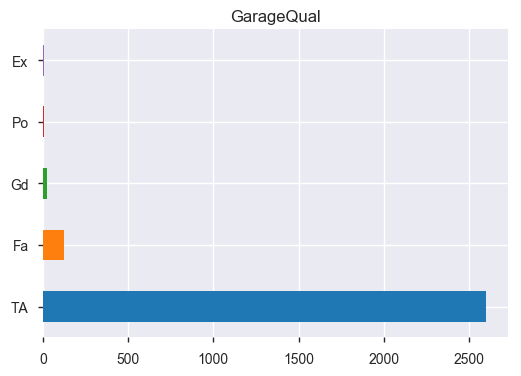

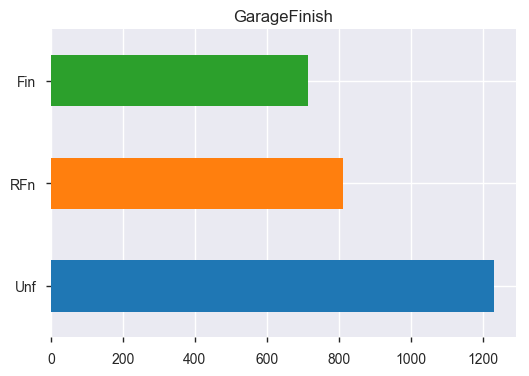

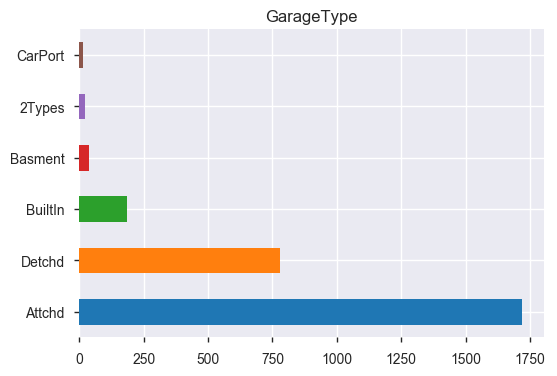

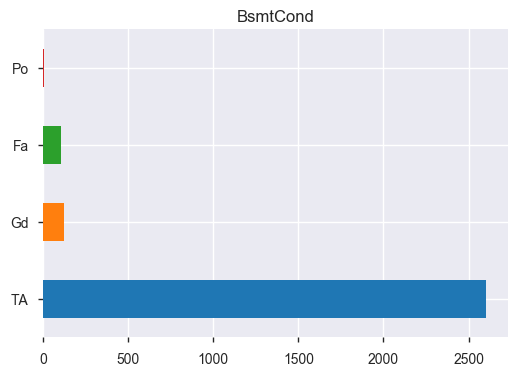

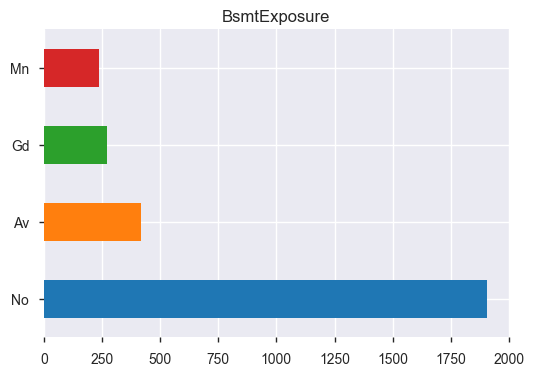

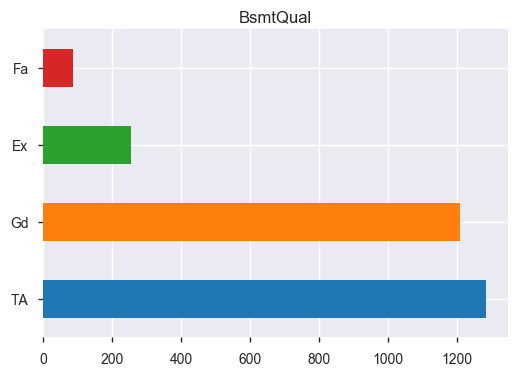

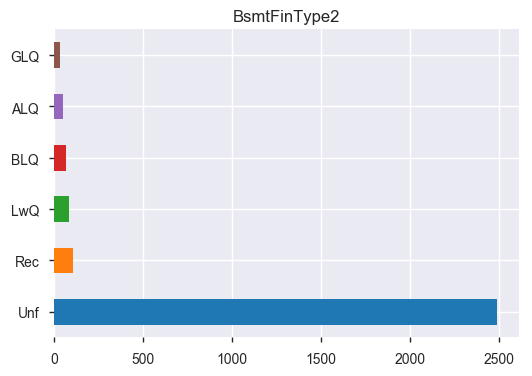

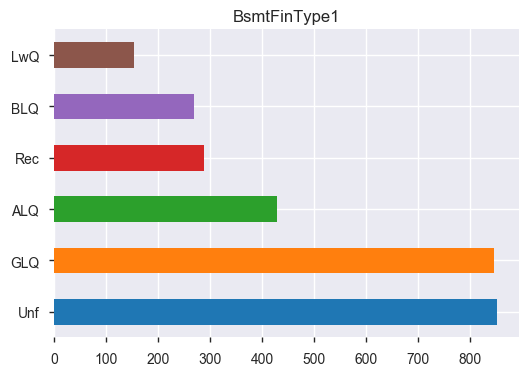

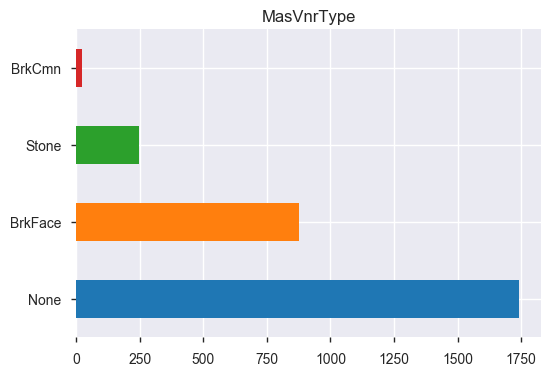

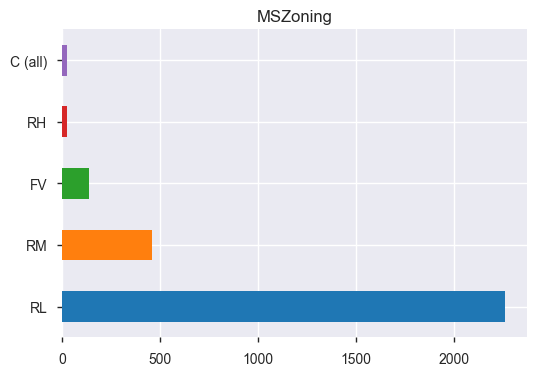

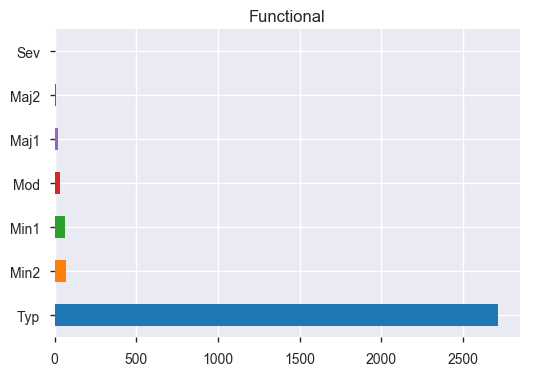

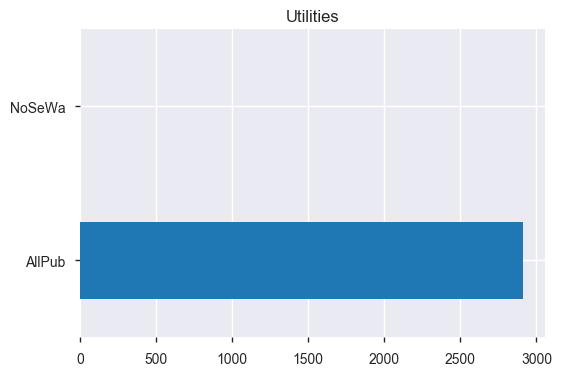

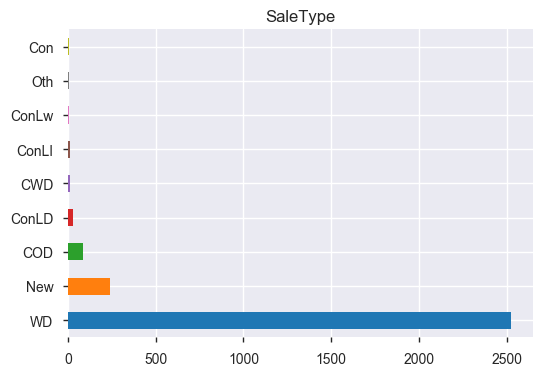

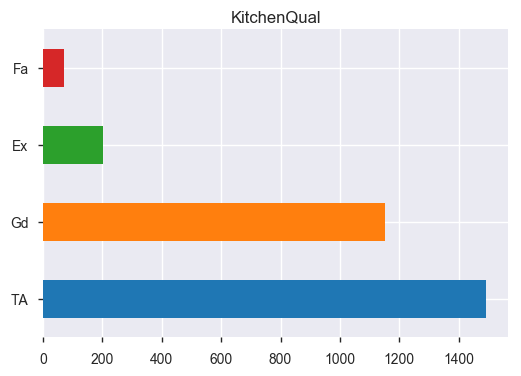

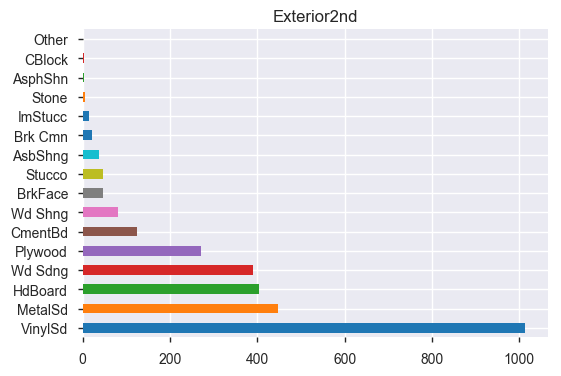

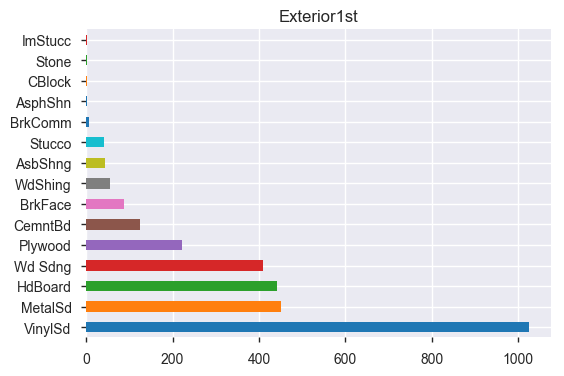

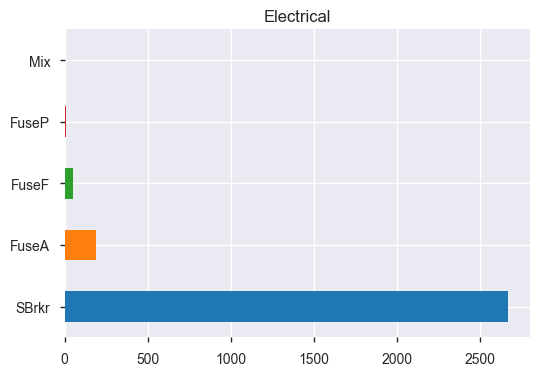

In [28]:
for i in List_cat_w_NaN_to_analyse:
    
    plt.figure()
    plt.title(i)
    cat_df[i].value_counts().plot.barh(figsize=(6, 4))
    plt.show()

In [29]:
# GarageType etc : data description says NA for garage features is "no garage"
cat_df.loc[:, "GarageType"] = cat_df.loc[:, "GarageType"].fillna("No")       
cat_df.loc[:, "GarageFinish"] = cat_df.loc[:, "GarageFinish"].fillna("No")   
cat_df.loc[:, "GarageQual"] = cat_df.loc[:, "GarageQual"].fillna("No")  
cat_df.loc[:, "GarageCond"] = cat_df.loc[:, "GarageCond"].fillna("No")  

# BsmtQual etc : data description says NA for basement features is "no basement"
cat_df.loc[:, "BsmtQual"] = cat_df.loc[:, "BsmtQual"].fillna("No")
cat_df.loc[:, "BsmtCond"] = cat_df.loc[:, "BsmtCond"].fillna("No")
cat_df.loc[:, "BsmtExposure"] = cat_df.loc[:, "BsmtExposure"].fillna("No")
cat_df.loc[:, "BsmtFinType1"] = cat_df.loc[:, "BsmtFinType1"].fillna("No")
cat_df.loc[:, "BsmtFinType2"] = cat_df.loc[:, "BsmtFinType2"].fillna("No")

# MasVnrType : NA most likely means no veneer
cat_df.loc[:, "MasVnrType"] = cat_df.loc[:, "MasVnrType"].fillna("None")

# Utilities : NA most likely means all public utilities
cat_df.loc[:, "Utilities"] = cat_df.loc[:, "Utilities"].fillna("AllPub")

# KitchenQual : NA most likely means typical
cat_df.loc[:, "KitchenQual"] = cat_df.loc[:, "KitchenQual"].fillna("TA")

# Functional : data description says NA means typical.
cat_df.loc[:, "Functional"] = cat_df.loc[:, "Functional"].fillna("Typ")

In [30]:
# We fill the rest just with the most common values.
cat_df = cat_df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [31]:
cat_df.shape

(2915, 43)

## Numerical features.

In [32]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

In [33]:
num_df = all_data[numeric_feats]
num_df.shape

(2915, 36)

In [34]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 0 to 1458
Data columns (total 36 columns):
MSSubClass       2915 non-null int64
LotFrontage      2429 non-null float64
LotArea          2915 non-null int64
OverallQual      2915 non-null int64
OverallCond      2915 non-null int64
YearBuilt        2915 non-null int64
YearRemodAdd     2915 non-null int64
MasVnrArea       2892 non-null float64
BsmtFinSF1       2914 non-null float64
BsmtFinSF2       2914 non-null float64
BsmtUnfSF        2914 non-null float64
TotalBsmtSF      2914 non-null float64
1stFlrSF         2915 non-null int64
2ndFlrSF         2915 non-null int64
LowQualFinSF     2915 non-null int64
GrLivArea        2915 non-null int64
BsmtFullBath     2913 non-null float64
BsmtHalfBath     2913 non-null float64
FullBath         2915 non-null int64
HalfBath         2915 non-null int64
BedroomAbvGr     2915 non-null int64
KitchenAbvGr     2915 non-null int64
TotRmsAbvGrd     2915 non-null int64
Fireplaces       2915 non-

In [35]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2915.0,57.133791,42.546667,20.0,20.0,50.0,70.00,190.0
LotFrontage,2429.0,69.128860,22.715440,21.0,59.0,68.0,80.00,313.0
LotArea,2915.0,10133.648714,7806.198515,1300.0,7474.0,9450.0,11554.50,215245.0
OverallQual,2915.0,6.083705,1.403444,1.0,5.0,6.0,7.00,10.0
OverallCond,2915.0,5.565009,1.113718,1.0,5.0,5.0,6.00,9.0
YearBuilt,2915.0,1971.271698,30.290998,1872.0,1953.0,1973.0,2001.00,2010.0
YearRemodAdd,2915.0,1984.240480,20.897341,1950.0,1965.0,1993.0,2004.00,2010.0
MasVnrArea,2892.0,101.399378,177.452915,0.0,0.0,0.0,164.00,1600.0
BsmtFinSF1,2914.0,438.098147,442.872077,0.0,0.0,368.0,732.00,4010.0
BsmtFinSF2,2914.0,49.650309,169.311762,0.0,0.0,0.0,0.00,1526.0


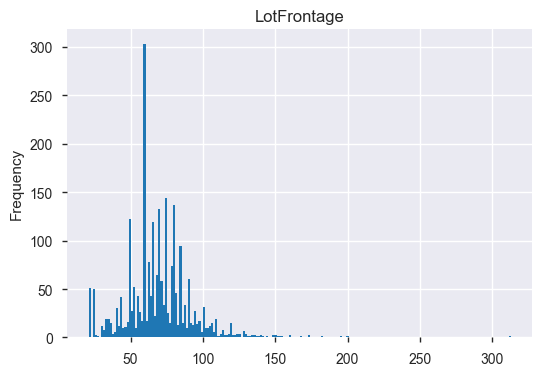

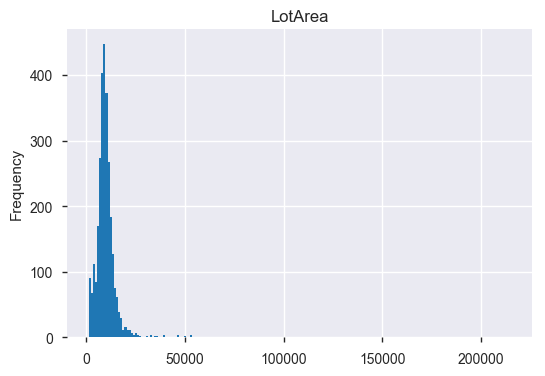

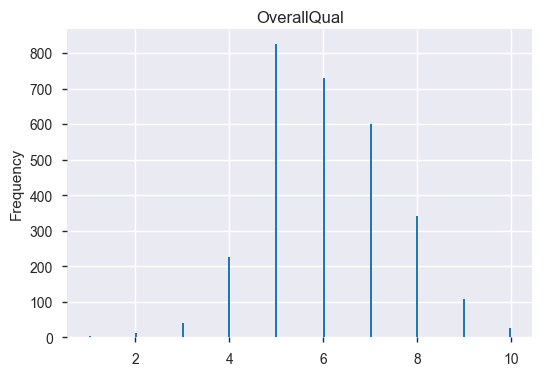

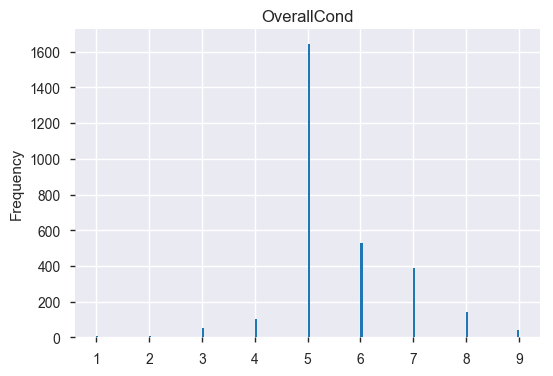

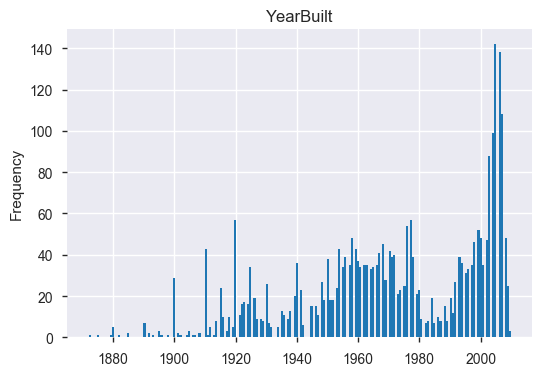

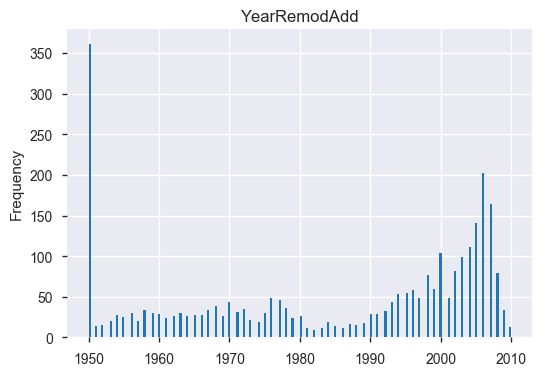

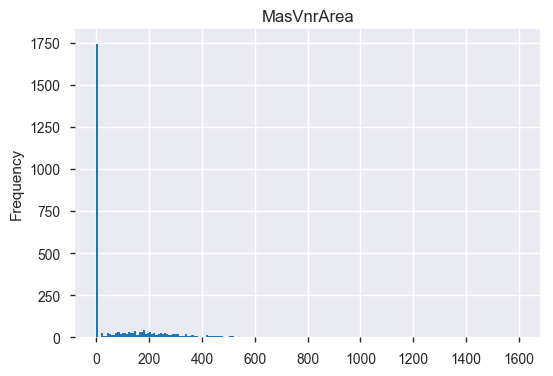

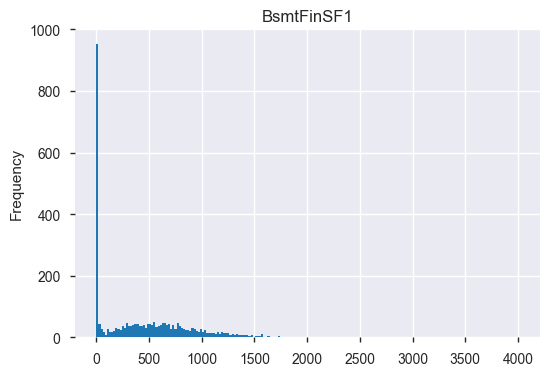

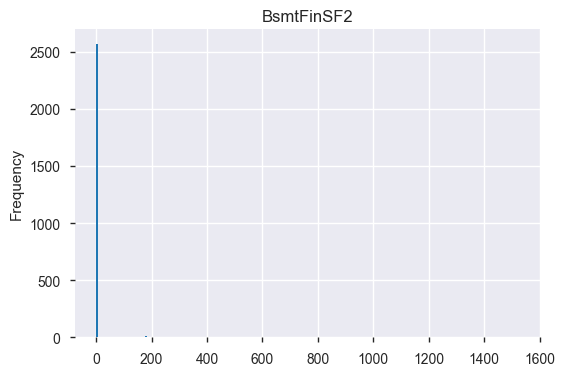

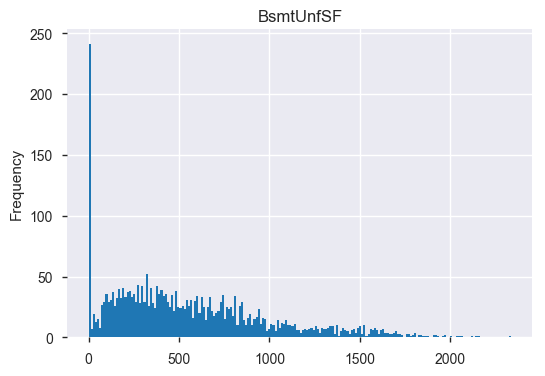

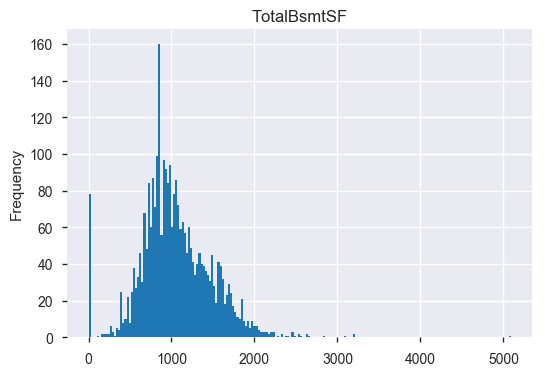

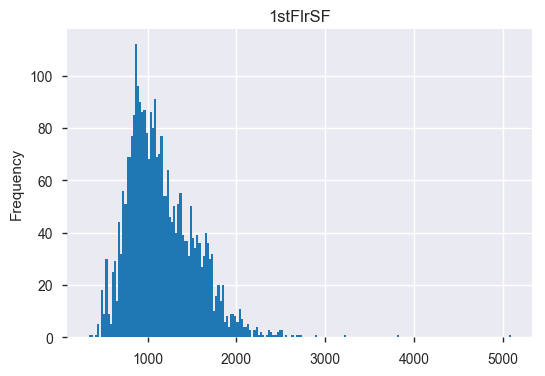

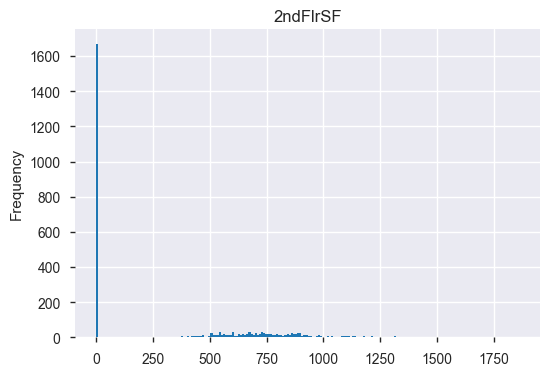

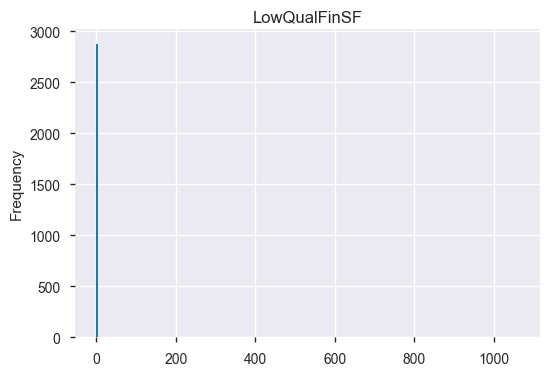

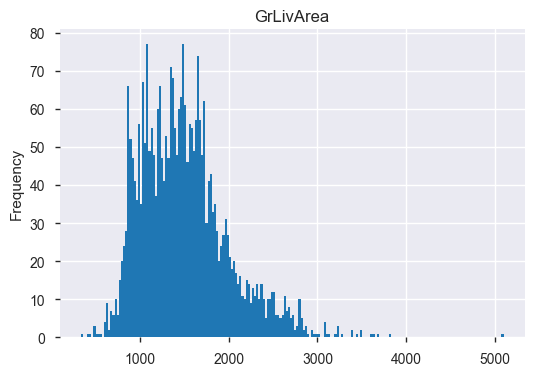

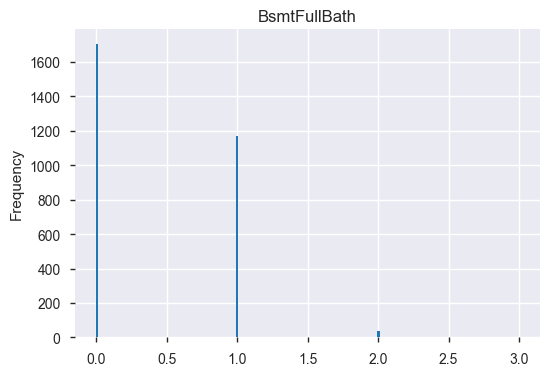

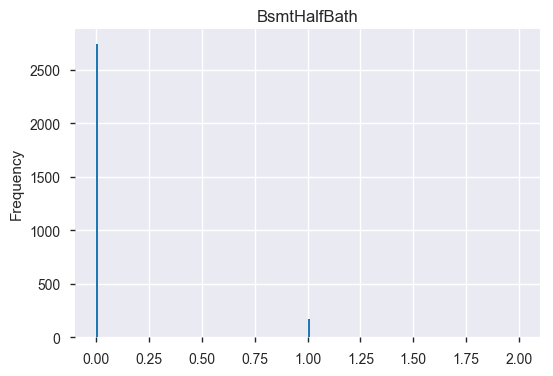

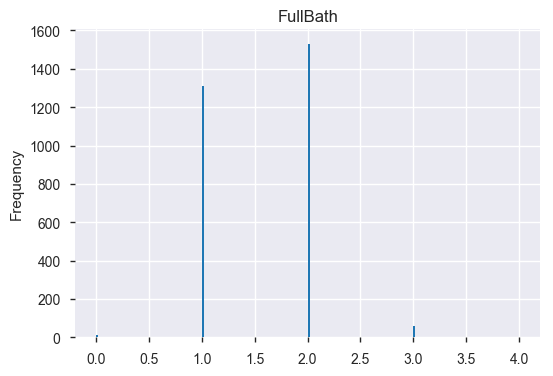

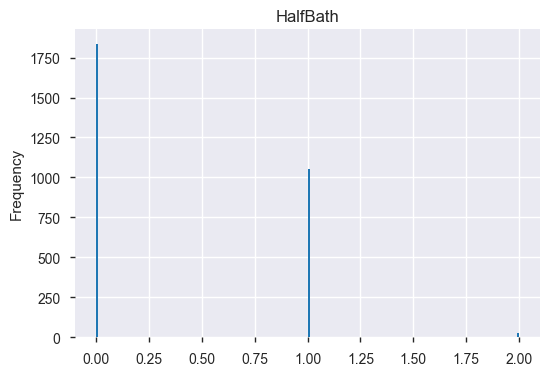

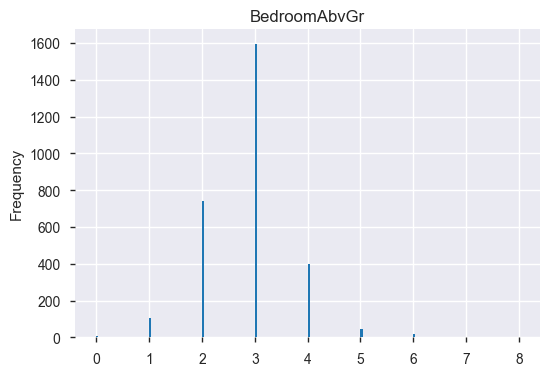

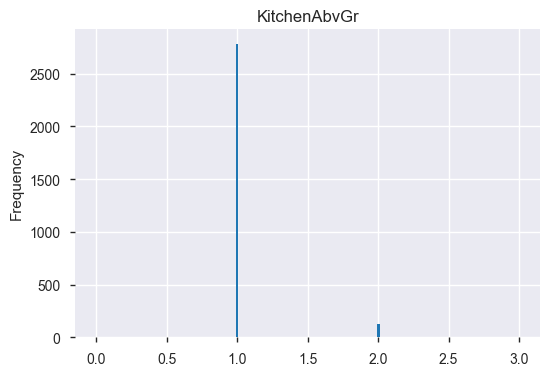

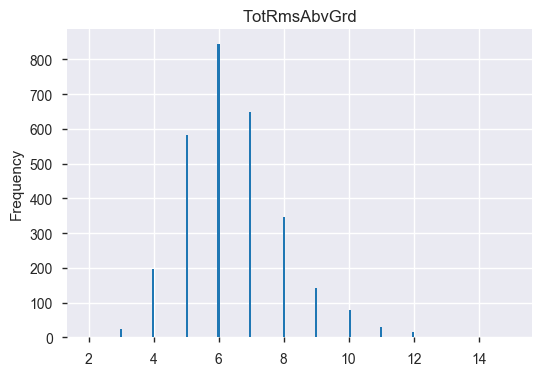

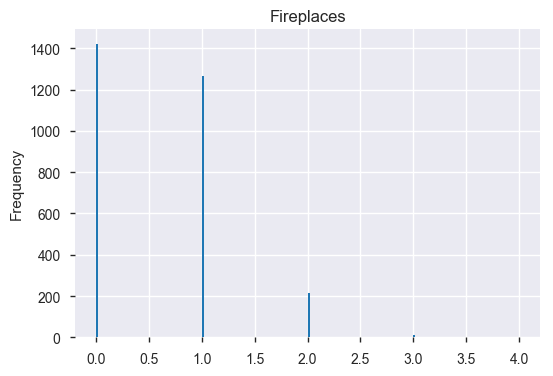

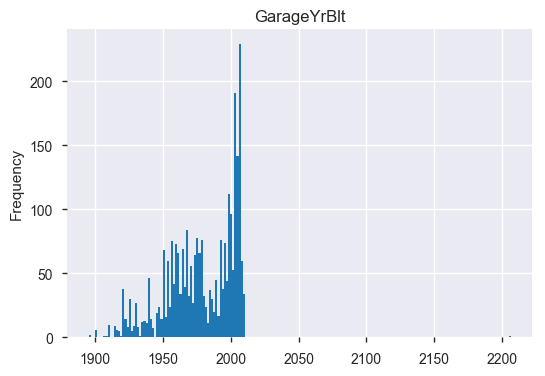

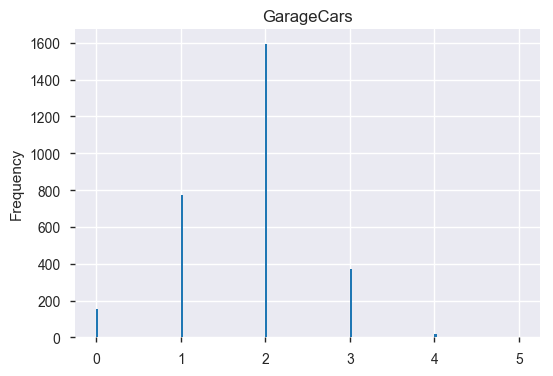

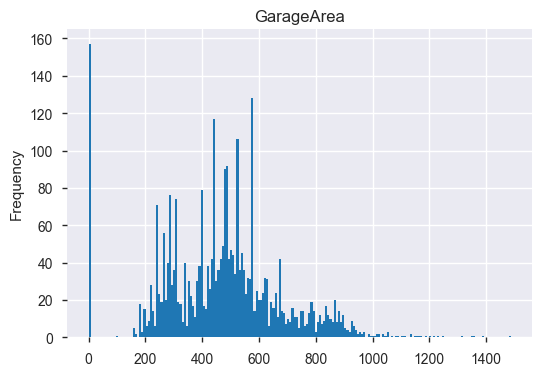

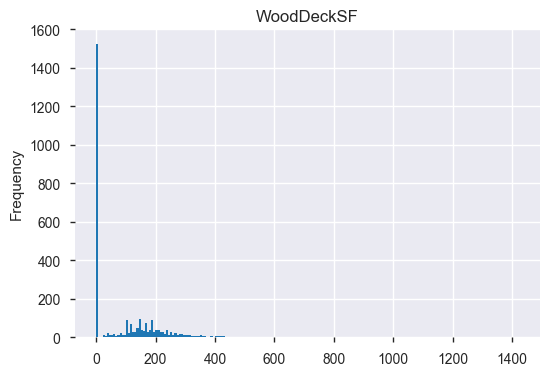

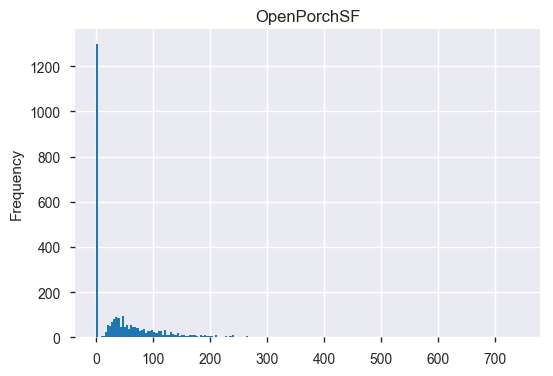

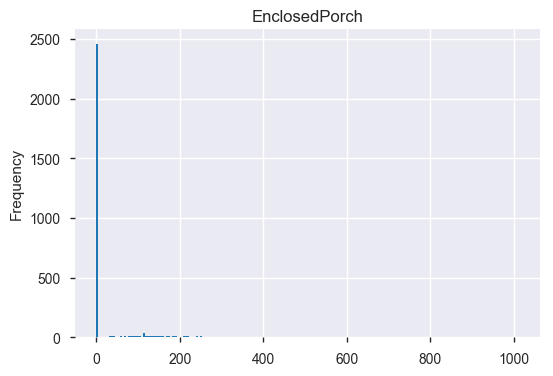

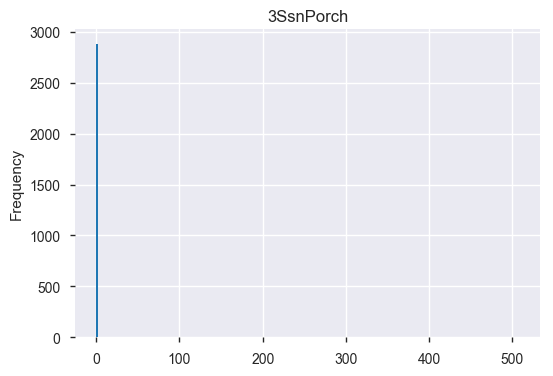

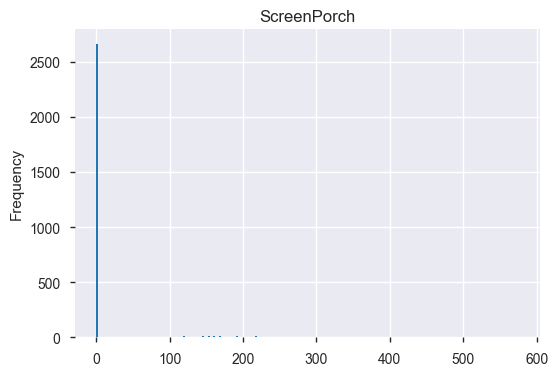

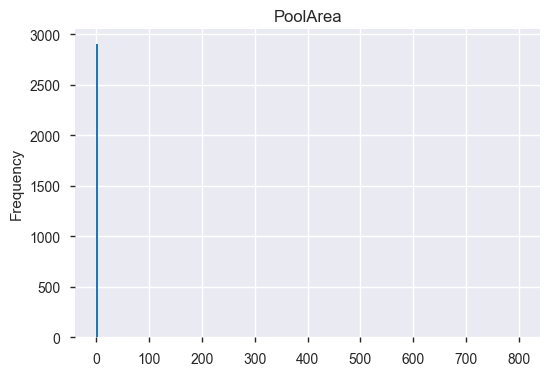

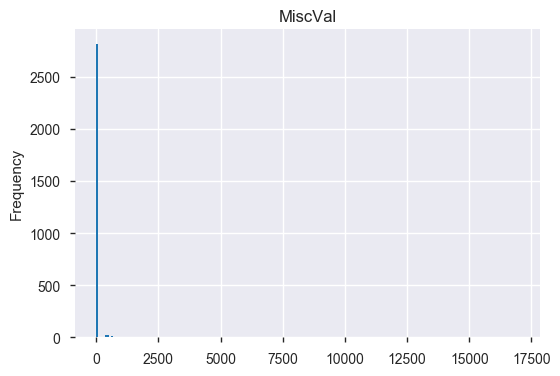

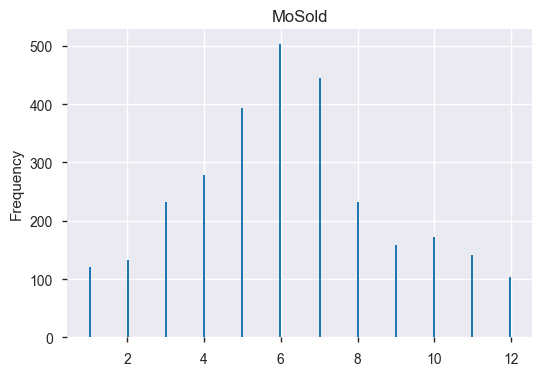

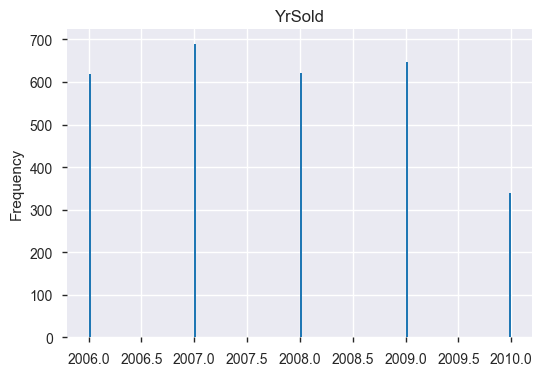

In [36]:
for i in list(num_df.columns)[1:]:
    
    plt.figure()  
    plt.title(i)
    num_df[i].plot.hist( bins=200, figsize=(6, 4))
    plt.show()

### Skewness.

Let's compute skewness.

In [37]:
skewed_feats = num_df.apply(lambda x: skew(x.dropna())) 

In [38]:
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats

MSSubClass        1.374804
LotFrontage       1.112611
LotArea          13.123758
MasVnrArea        2.588358
BsmtFinSF1        0.973776
BsmtFinSF2        4.142042
BsmtUnfSF         0.920146
1stFlrSF          1.253011
2ndFlrSF          0.843237
LowQualFinSF     12.080315
GrLivArea         0.977860
BsmtHalfBath      3.941288
KitchenAbvGr      4.298845
WoodDeckSF        1.848285
OpenPorchSF       2.529245
EnclosedPorch     4.000796
3SsnPorch        11.368094
ScreenPorch       3.943508
PoolArea         18.701829
MiscVal          21.932147
dtype: float64

In [39]:
skewed_feats = skewed_feats.index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

### Working with NaN's.

In [40]:
num_df.isnull().sum().sort_values(ascending=False).head(15)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
GarageArea        1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageCars        1
OverallCond       0
YearBuilt         0
YearRemodAdd      0
OverallQual       0
dtype: int64

In [41]:
Index_bigger_0 = num_df.isnull().sum().sort_values(ascending=False).values > 0
List_num_w_NaN = list(num_df.isnull().sum().sort_values(ascending=False).loc[Index_bigger_0].keys())
List_num_w_NaN

['LotFrontage',
 'GarageYrBlt',
 'MasVnrArea',
 'BsmtHalfBath',
 'BsmtFullBath',
 'GarageArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageCars']

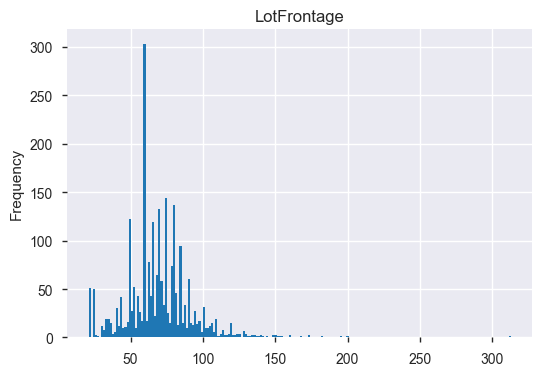

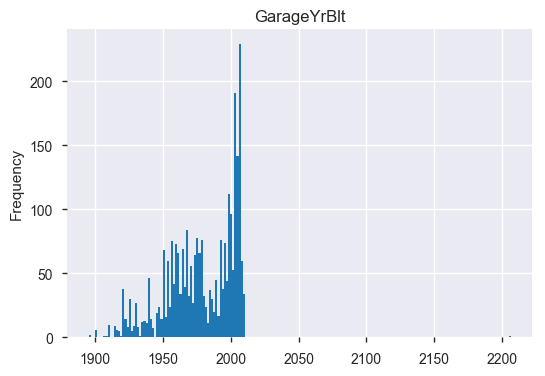

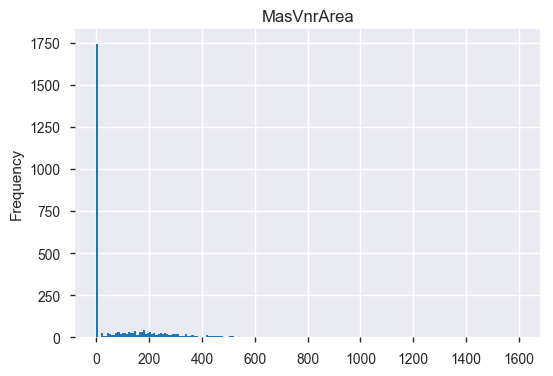

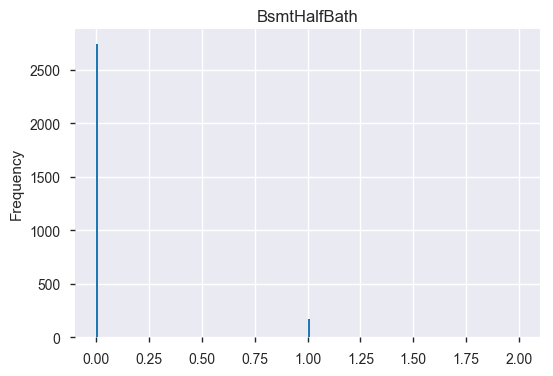

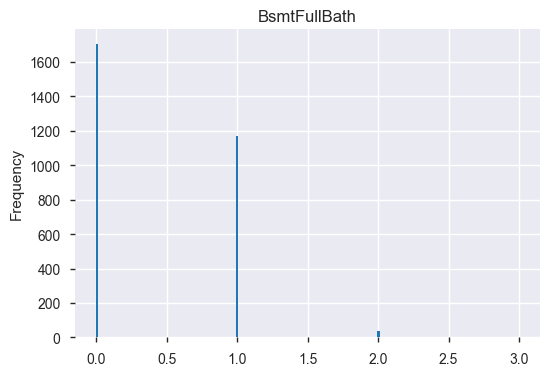

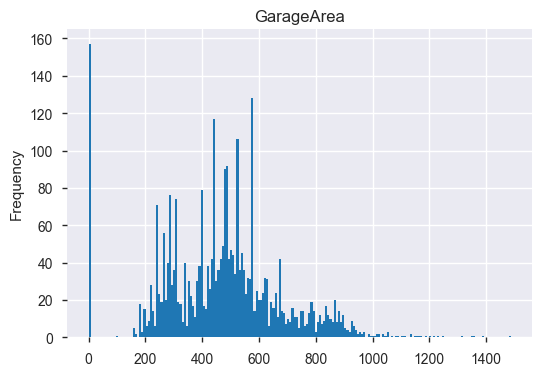

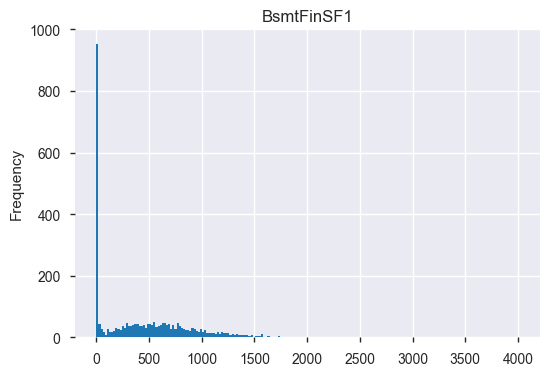

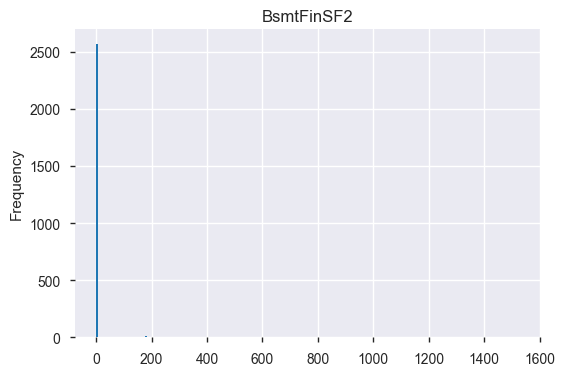

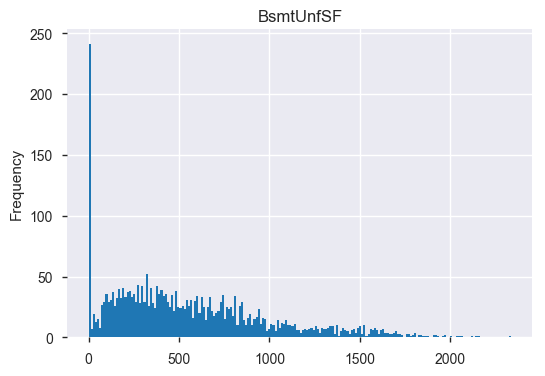

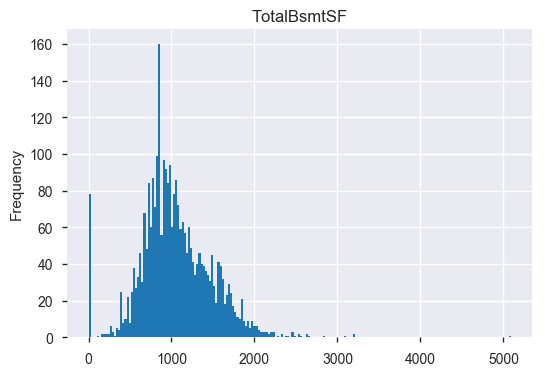

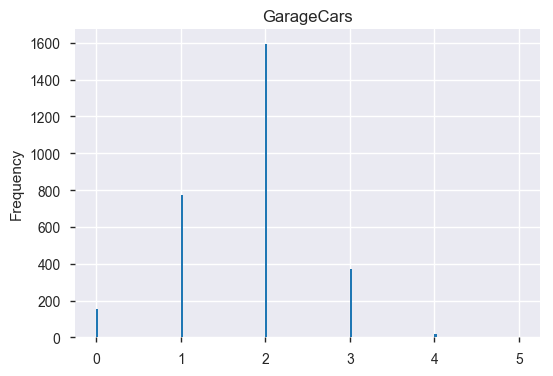

In [42]:
for i in List_num_w_NaN:
    plt.figure()  
    plt.title(i)
    num_df[i].plot.hist( bins=200, figsize=(6, 4))
    plt.show()

Let's fill "LotFrontage", "GarageYrBlt" features with most common values.

In [43]:
num_col_fill_MostCom = ["LotFrontage", "GarageYrBlt"]
num_df[num_col_fill_MostCom] = num_df[num_col_fill_MostCom].apply(lambda x:x.fillna(x.value_counts().index[0]))

We fill the rest just with 0.

In [44]:
num_df = num_df.apply(lambda x:x.fillna(0))

In [92]:
sum(num_df.isnull().any())

0

## Generating features.

Some numerical features are actually really categories.

In [46]:
num_df = num_df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

Encode some categorical features as ordered numbers when there is information in the order.

In [47]:
cat_df = cat_df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [48]:
cat_df.shape

(2915, 43)

In [49]:
num_df.shape

(2915, 36)

In [50]:
all_data_processed = pd.concat([num_df, cat_df], axis=1)
all_data_processed.shape

(2915, 79)

Create new features.

In [51]:
# Simplifications of existing features
all_data_processed["SimplOverallQual"] = all_data_processed.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                   4 : 2, 5 : 2, 6 : 2, # average
                                                   7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                  })
all_data_processed["SimplOverallCond"] = all_data_processed.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                   4 : 2, 5 : 2, 6 : 2, # average
                                                   7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                  })
all_data_processed["SimplPoolQC"] = all_data_processed.PoolQC.replace({1 : 1, 2 : 1, # average
                                         3 : 2, 4 : 2 # good
                                        })
all_data_processed["SimplGarageCond"] = all_data_processed.GarageCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
all_data_processed["SimplGarageQual"] = all_data_processed.GarageQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
all_data_processed["SimplFireplaceQu"] = all_data_processed.FireplaceQu.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
all_data_processed["SimplFireplaceQu"] = all_data_processed.FireplaceQu.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
all_data_processed["SimplFunctional"] = all_data_processed.Functional.replace({1 : 1, 2 : 1, # bad
                                                 3 : 2, 4 : 2, # major
                                                 5 : 3, 6 : 3, 7 : 3, # minor
                                                 8 : 4 # typical
                                                })
all_data_processed["SimplKitchenQual"] = all_data_processed.KitchenQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
all_data_processed["SimplHeatingQC"] = all_data_processed.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
all_data_processed["SimplBsmtFinType1"] = all_data_processed.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
all_data_processed["SimplBsmtFinType2"] = all_data_processed.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
all_data_processed["SimplBsmtCond"] = all_data_processed.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
all_data_processed["SimplBsmtQual"] = all_data_processed.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
all_data_processed["SimplExterCond"] = all_data_processed.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
all_data_processed["SimplExterQual"] = all_data_processed.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

In [52]:
# Combinations of existing features
# Overall quality of the house
all_data_processed["OverallGrade"] = all_data_processed["OverallQual"] * all_data_processed["OverallCond"]
# Overall quality of the garage
all_data_processed["GarageGrade"] = all_data_processed["GarageQual"] * all_data_processed["GarageCond"]
# Overall quality of the exterior
all_data_processed["ExterGrade"] = all_data_processed["ExterQual"] * all_data_processed["ExterCond"]
# Overall kitchen score
all_data_processed["KitchenScore"] = all_data_processed["KitchenAbvGr"] * all_data_processed["KitchenQual"]
# Overall fireplace score
all_data_processed["FireplaceScore"] = all_data_processed["Fireplaces"] * all_data_processed["FireplaceQu"]
# Overall garage score
all_data_processed["GarageScore"] = all_data_processed["GarageArea"] * all_data_processed["GarageQual"]
# Overall pool score
all_data_processed["PoolScore"] = all_data_processed["PoolArea"] * all_data_processed["PoolQC"]
# Simplified overall quality of the house
all_data_processed["SimplOverallGrade"] = all_data_processed["SimplOverallQual"] * all_data_processed["SimplOverallCond"]
# Simplified overall quality of the exterior
all_data_processed["SimplExterGrade"] = all_data_processed["SimplExterQual"] * all_data_processed["SimplExterCond"]
# Simplified overall pool score
all_data_processed["SimplPoolScore"] = all_data_processed["PoolArea"] * all_data_processed["SimplPoolQC"]
# Simplified overall garage score
all_data_processed["SimplGarageScore"] = all_data_processed["GarageArea"] * all_data_processed["SimplGarageQual"]
# Simplified overall fireplace score
all_data_processed["SimplFireplaceScore"] = all_data_processed["Fireplaces"] * all_data_processed["SimplFireplaceQu"]
# Simplified overall kitchen score
all_data_processed["SimplKitchenScore"] = all_data_processed["KitchenAbvGr"] * all_data_processed["SimplKitchenQual"]
# Total number of bathrooms
all_data_processed["TotalBath"] = all_data_processed["BsmtFullBath"] + (0.5 * all_data_processed["BsmtHalfBath"]) + \
all_data_processed["FullBath"] + (0.5 * all_data_processed["HalfBath"])
# Total SF for house (incl. basement)
all_data_processed["AllSF"] = all_data_processed["GrLivArea"] + all_data_processed["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
all_data_processed["AllFlrsSF"] = all_data_processed["1stFlrSF"] + all_data_processed["2ndFlrSF"]
# Total SF for porch
all_data_processed["AllPorchSF"] = all_data_processed["OpenPorchSF"] + all_data_processed["EnclosedPorch"] + \
all_data_processed["3SsnPorch"] + all_data_processed["ScreenPorch"]
# Has masonry veneer or not
all_data_processed["HasMasVnr"] = all_data_processed.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
all_data_processed["BoughtOffPlan"] = all_data_processed.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

In [53]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train_df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.800858
GrLivArea        0.720516
GarageCars       0.649256
TotalBsmtSF      0.646584
GarageArea       0.636964
1stFlrSF         0.625235
FullBath         0.559048
TotRmsAbvGrd     0.537462
YearBuilt        0.535279
YearRemodAdd     0.521428
GarageYrBlt      0.499230
MasVnrArea       0.478862
Fireplaces       0.466765
BsmtFinSF1       0.395923
LotFrontage      0.356773
OpenPorchSF      0.330361
WoodDeckSF       0.322538
2ndFlrSF         0.297301
HalfBath         0.282925
LotArea          0.269866
BsmtFullBath     0.235697
BsmtUnfSF        0.220678
BedroomAbvGr     0.160542
ScreenPorch      0.118324
MoSold           0.056797
3SsnPorch        0.047414
PoolArea         0.032819
BsmtFinSF2      -0.008900
MiscVal         -0.021097
YrSold          -0.023694
LowQualFinSF    -0.025351
Id              -0.027455
BsmtHalfBath    -0.036792
OverallCond     -0.080202
MSSubClass      -0.088160
EnclosedPorch   

In [54]:
#Polynomials on the top 10 existing features
all_data_processed["OverallQual-s2"] = all_data_processed["OverallQual"] ** 2
all_data_processed["OverallQual-s3"] = all_data_processed["OverallQual"] ** 3
all_data_processed["OverallQual-Sq"] = np.sqrt(all_data_processed["OverallQual"])
all_data_processed["AllSF-2"] = all_data_processed["AllSF"] ** 2
all_data_processed["AllSF-3"] = all_data_processed["AllSF"] ** 3
all_data_processed["AllSF-Sq"] = np.sqrt(all_data_processed["AllSF"])
all_data_processed["AllFlrsSF-2"] = all_data_processed["AllFlrsSF"] ** 2
all_data_processed["AllFlrsSF-3"] = all_data_processed["AllFlrsSF"] ** 3
all_data_processed["AllFlrsSF-Sq"] = np.sqrt(all_data_processed["AllFlrsSF"])
all_data_processed["GrLivArea-2"] = all_data_processed["GrLivArea"] ** 2
all_data_processed["GrLivArea-3"] = all_data_processed["GrLivArea"] ** 3
all_data_processed["GrLivArea-Sq"] = np.sqrt(all_data_processed["GrLivArea"])
all_data_processed["SimplOverallQual-s2"] = all_data_processed["SimplOverallQual"] ** 2
all_data_processed["SimplOverallQual-s3"] = all_data_processed["SimplOverallQual"] ** 3
all_data_processed["SimplOverallQual-Sq"] = np.sqrt(all_data_processed["SimplOverallQual"])
all_data_processed["ExterQual-2"] = all_data_processed["ExterQual"] ** 2
all_data_processed["ExterQual-3"] = all_data_processed["ExterQual"] ** 3
all_data_processed["ExterQual-Sq"] = np.sqrt(all_data_processed["ExterQual"])
all_data_processed["GarageCars-2"] = all_data_processed["GarageCars"] ** 2
all_data_processed["GarageCars-3"] = all_data_processed["GarageCars"] ** 3
all_data_processed["GarageCars-Sq"] = np.sqrt(all_data_processed["GarageCars"])
all_data_processed["TotalBath-2"] = all_data_processed["TotalBath"] ** 2
all_data_processed["TotalBath-3"] = all_data_processed["TotalBath"] ** 3
all_data_processed["TotalBath-Sq"] = np.sqrt(all_data_processed["TotalBath"])
all_data_processed["KitchenQual-2"] = all_data_processed["KitchenQual"] ** 2
all_data_processed["KitchenQual-3"] = all_data_processed["KitchenQual"] ** 3
all_data_processed["KitchenQual-Sq"] = np.sqrt(all_data_processed["KitchenQual"])
all_data_processed["GarageScore-2"] = all_data_processed["GarageScore"] ** 2
all_data_processed["GarageScore-3"] = all_data_processed["GarageScore"] ** 3
all_data_processed["GarageScore-Sq"] = np.sqrt(all_data_processed["GarageScore"])

Differentiate numerical features (minus the target) and categorical features one time more.

In [55]:
categorical_features = all_data_processed.select_dtypes(include = ["object"]).columns
numerical_features = all_data_processed.select_dtypes(exclude = ["object"]).columns
#numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
all_num = all_data_processed[numerical_features]
all_cat = all_data_processed[categorical_features]

Numerical features : 117
Categorical features : 26


Create dummy features for categorical values via one-hot encoding.

In [56]:
print("NAs for categorical features in data : " + str(all_cat.isnull().values.sum()))
all_cat = pd.get_dummies(all_cat)
print("Remaining NAs for categorical features in data : " + str(all_cat.isnull().values.sum()))

NAs for categorical features in data : 0
Remaining NAs for categorical features in data : 0


In [57]:
all_cat.shape

(2915, 203)

## Join, split, scale.

In [58]:
# Join categorical and numerical features
all_data = pd.concat([all_num, all_cat], axis = 1)
print("New number of features : " + str(all_data.shape[1]))

New number of features : 320


In [59]:
train = all_data.iloc[ :train_index, :]
test = all_data.iloc[ train_index:, :]

In [60]:
train_arr = train.values
test_arr = test.values

In [61]:
# Partition the dataset in train + validation sets
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_val : " + str(X_val.shape))
print("y_train : " + str(y_train.shape))
print("y_val : " + str(y_val.shape))

X_train : (1019, 320)
X_val : (437, 320)
y_train : (1019,)
y_val : (437,)


Normalization.

In [62]:
scaler = StandardScaler()

In [63]:
%%time

train.loc[:, numerical_features] = scaler.fit_transform(train.loc[:, numerical_features])
test.loc[:, numerical_features] = scaler.transform(test.loc[:, numerical_features])

CPU times: user 16.3 s, sys: 129 ms, total: 16.5 s
Wall time: 17.8 s


In [64]:
train_arr_scaled = train.values
test_arr_scaled = test.values

In [65]:
%%time

X_train.loc[:, numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
X_val.loc[:, numerical_features] = scaler.transform(X_val.loc[:, numerical_features])

CPU times: user 12.9 s, sys: 30.1 ms, total: 12.9 s
Wall time: 13 s


# Trying different models.

## Linear regression without scaling.

In [66]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 
           'neg_median_absolute_error', 'r2']

In [67]:
linreg = LinearRegression()

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(linreg, train_arr, target, cv=5, scoring=metric))
print(linreg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [68]:
for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

neg_mean_absolute_error -16747.99375
neg_mean_squared_error -675386552.10208
neg_median_absolute_error -10961.04827
r2 0.88461


In [69]:
linreg = LinearRegression()

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(linreg, train_arr, log_target, cv=5,  scoring=metric))
print(linreg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [70]:
for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

neg_mean_absolute_error -0.08712
neg_mean_squared_error -0.01714
neg_median_absolute_error -0.06078
r2 0.89048


## Linear regression with scaling.

In [71]:
linreg = LinearRegression()

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(linreg, train_arr_scaled, target, cv=5, scoring=metric))
print(linreg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [72]:
for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

neg_mean_absolute_error -33341343654301.01172
neg_mean_squared_error -1597449975410478268799233556480.00000
neg_median_absolute_error -10988.12043
r2 -288732488654418935808.00000


In [73]:
linreg = LinearRegression()

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(linreg, train_arr_scaled, log_target, cv=5, scoring=metric))
print(linreg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [74]:
for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

neg_mean_absolute_error -618341031.06041
neg_mean_squared_error -549436115599156051968.00000
neg_median_absolute_error -0.06077
r2 -3677070070918777667584.00000


## Lasso out-of-box.

In [75]:
linreg = Lasso(random_state=random_state)

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(linreg, train_arr_scaled, log_target, cv=5, scoring=metric))
print(linreg)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=17,
   selection='cyclic', tol=0.0001, warm_start=False)


In [76]:
for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

neg_mean_absolute_error -0.30849
neg_mean_squared_error -0.15694
neg_median_absolute_error -0.24582
r2 -0.00311


## Parameter tuning for Lasso.

In [77]:
def neg_rmse_cv(model):
    rmse=cross_val_score(model, train_arr_scaled, log_target, scoring="neg_mean_squared_error", cv=5)
    return(rmse)

In [78]:
alphas = [ 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5 ]
cv_lasso = [neg_rmse_cv(Lasso(alpha=alpha, random_state=random_state)).mean() for alpha in alphas]

Text(0,0.5,'neg_mse')

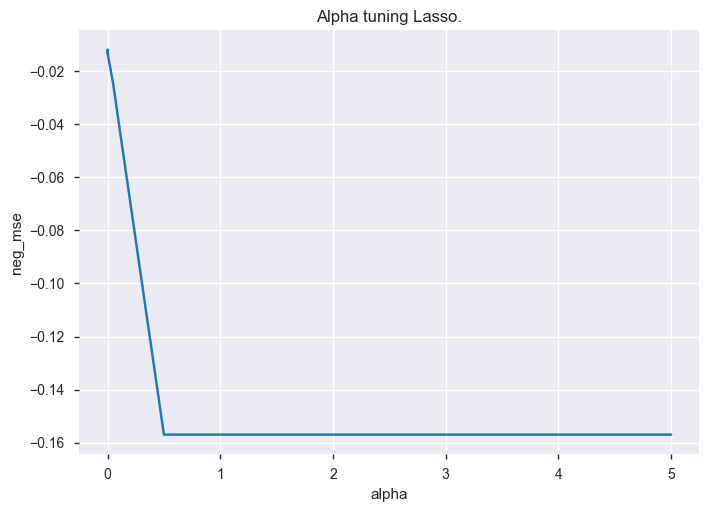

In [79]:
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Alpha tuning Lasso.")
plt.xlabel("alpha")
plt.ylabel("neg_mse")

In [80]:
reg = Lasso( alpha=0.0001, random_state=random_state)

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(reg, train_arr_scaled, log_target, cv=5, scoring=metric))
print(reg)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=17,
   selection='cyclic', tol=0.0001, warm_start=False)


In [81]:
for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

neg_mean_absolute_error -0.07958
neg_mean_squared_error -0.01341
neg_median_absolute_error -0.05615
r2 0.91425


## Ridge out-of-box.

In [82]:
reg = Ridge(random_state=random_state)

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(reg, train_arr_scaled, log_target, cv=5, scoring=metric))
print(reg)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=17, solver='auto', tol=0.001)


In [83]:
for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

neg_mean_absolute_error -0.08209
neg_mean_squared_error -0.01420
neg_median_absolute_error -0.05781
r2 0.90918


## Parameter tuning for Ridge.

In [84]:
alphas = [0.05, 0.1, 0.3, 1, 5, 10, 15, 30, 50, 75]
cv_ridge = [neg_rmse_cv(Ridge(alpha=alpha, random_state=random_state)).mean() for alpha in alphas]

Text(0,0.5,'neg_mse')

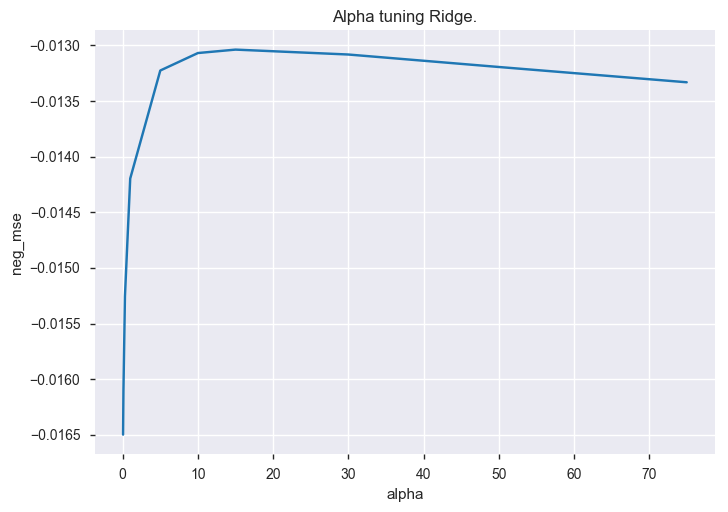

In [85]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Alpha tuning Ridge.")
plt.xlabel("alpha")
plt.ylabel("neg_mse")

In [86]:
reg = Ridge(alpha=15, random_state=random_state)

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(reg, train_arr_scaled, log_target, cv=5, scoring=metric))
print(reg)

Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=17, solver='auto', tol=0.001)


In [87]:
for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

neg_mean_absolute_error -0.07917
neg_mean_squared_error -0.01304
neg_median_absolute_error -0.05545
r2 0.91646


## ElasticNet.

In [88]:
parameters = {'alpha':[ 0.00001, 0.00005, 0.0001, 0.0005],
              'l1_ratio':[    0.1, 0.5, 1, 5, 10, 20, 50, 100]}

In [89]:
regr = ElasticNet(random_state=random_state)
clf = GridSearchCV(estimator=regr, param_grid=parameters, n_jobs=-1, cv=5, scoring="neg_mean_squared_error", verbose=1)

In [90]:
clf.fit(train_arr_scaled, log_target)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


Process ForkPoolWorker-15:
Process ForkPoolWorker-14:
Process ForkPoolWorker-16:
Process ForkPoolWorker-13:


KeyboardInterrupt: 

In [ ]:
clf.best_score_ 

In [ ]:
clf.best_params_

In [ ]:
regr = ElasticNet(**clf.best_params_, random_state=random_state)

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(regr, train_arr_scaled, log_target, cv=5, scoring=metric))
print(regr)

for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

# Metrics.

In [94]:
def print_metrics(y_true, y_pred):
    print("*"*100)
    print("\nRegression metrics:\n")
    print("Mean absolute error {}".format(round(mean_absolute_error(y_true, y_pred), 4)))
    print("Mean squared error {}".format(round(mean_squared_error(y_true, y_pred), 4)))
    print("Median absolute error {}".format(round(median_absolute_error(y_true, y_pred), 4)))
    print("Explained variance score {}".format(round(explained_variance_score(y_true, y_pred), 4)))
    print("R2 score {} \n".format(round(r2_score(y_true, y_pred), 4)))
    print("*"*100)

In [96]:
print_metrics([1, 3, 67, 33, 3], [2, 4, 68, 34, 4])

****************************************************************************************************

Regression metrics:

Mean absolute error 1.0
Mean squared error 1.0
Median absolute error 1.0
Explained variance score 1.0
R2 score 0.9985 

****************************************************************************************************


In [ ]:
print_metrics([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
              [0, 1, 2, 3, 4, 5, 6, 7, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])